# EDA Individual Project

## "Has social media influenced Spanish society's opinion on feminism (or anti-feminism)?"

## Table of Contents

- [Influencers initial dataset](#influencers-initial-dataset)
  - [Visual Insights](#visual-insights)
  
- [Influencers content dataset](#influencers-content-dataset)

- [Feminism and Antifeminism Codebook](#feminism-and-Antifeminism-codebook)


In [86]:
# TO INSTALL
!pip install -U pip setuptools wheel
!pip install -U spacy

   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   ---------------------------------------- 1.2/1.2 MB 10.5 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 72.1.0
    Uninstalling setuptools-72.1.0:
      Successfully uninstalled setuptools-72.1.0
   ---------------------------------------- 0.0/11.7 MB ? eta -:--:--
   ---------- ----------------------------- 3.1/11.7 MB 16.8 MB/s eta 0:00:01
   ------------------------ --------------- 7.1/11.7 MB 16.8 MB/s eta 0:00:01
   ---------------------------------------  11.5/11.7 MB 19.0 MB/s eta 0:00:01
   ---------------------------------------- 11.7/11.7 MB 17.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.9 MB ? eta -:--:--
   ---------------------------------------- 1.9/1.9 MB 8.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 1.4/1.4 MB 18.8 MB/s eta 0:00:00
   -----

In [87]:
import spacy
spacy_nlp = spacy.load("en_core_web_sm")

OSError: [E050] Can't find model 'en_core_web_sm'. It doesn't seem to be a Python package or a valid path to a data directory.

In [8]:
#purpuse--> i'm going to traing to explain, and the basic ideas I have
# got from diferents sources. They will try to support what im trying to explain in my project. 
# during what period?? I got this info from datas and sources taken from librearies social media during 2022

In [9]:
#pip install pandas openpyxl
import pandas as pd
import re

from io import StringIO

## Influencers initial dataset

In [10]:
path_file_influencers = r"C:\Users\Celeste\Google Drive Streaming\My Drive\_CODEOP\EDA_Feminism_Influencers_Spain\data\Influencers Initial Dataset.xlsx"

df_influencers = pd.read_excel(path_file_influencers)

df_influencers.head(9)

#repasar signos de puntuación "brackets", "curly brackets", "colon" "quotation marks", "slash"

#these are the fountains where I got enough material to do my research, different kind of information

,id,influencer's name,real name,age,ref. edad,education,ref. educacion,previous_occupation,ref. ocupacion,main platform,secondary platform,# follower,link_plataforma
0,1,Ibai Llanos,Ibai Llanos Garatea,28,Ibai Llanos - Wikiwand,4,https://www.wikiwand.com/es/Ibai_Llanos,Narrador esports,▷ Ibai Llanos Wiki ≫ Biografía de este Influen...,Twitch,Youtube,"12,8M",ibai - Twitch
1,2,Maria Pombo,María Pombo,28,https://www.modelocurriculum.net/biografias/in...,4,https://www.modelocurriculum.net/biografias/in...,NaN,NaN,Instagram,NaN,"2,9M",https://www.instagram.com/mariapombo/
2,3,Naim Darrechi,Naim Darrechi,20,https://historia-biografia.com/naim-darrechi/,NaN,NaN,-,-,TikTok,Instagram,29M,https://www.tiktok.com/@naimdarrechi?lang=es
3,4,Jordi Wild,Jordi Carrillo de Albornoz Torres,38,▷ Jordi Wild Wiki ≫ Biografía de este Influenc...,6,▷ Jordi Wild Wiki ≫ Biografía de este Influenc...,-,NaN,YouTube,Twitter,"3,59M",The Wild Project - YouTube
4,5,Iker Unzu,Iker Unzueta Ramos,18,"Iker Unzu - Edad, Familia, Biografía | Famous ...",3,Iker Unzu | Wiki YouTube Pedia | Fandom,-,-,TikTok,YouTube,"11,4M",Iker Unzu (@ikerunzu) oficial | TikTok
5,6,ElRubius,Rubén Doblas Gundersen,33,https://es.wikipedia.org/wiki/El_Rubius,5,https://es.wikipedia.org/wiki/El_Rubius,Dependiente,https://es.wikipedia.org/wiki/El_Rubius,YouTube,Twitch,"40,4M",https://www.youtube.com/@elrubiusOMG/videos
6,7,Samantha Hudosn,(nombre de nacimiento): Iván González Ranedo,23,"Samantha Hudson - Wikipedia, la enciclopedia l...",4,"Samantha Hudson - Wikipedia, la enciclopedia l...",Artista,"Samantha Hudson - Wikipedia, la enciclopedia l...",Instagram,Twitter,308K,Samantha Hudson (@badbixsamantha) • Fotos y vi...
7,8,Roma Gallardo,Alfonso Gallardo,34,https://youtube.fandom.com/es/wiki/Roma_Gallardo,NaN,NaN,-,-,YouTube,Twitter,"1,75M",https://www.youtube.com/@romagallardo7504
8,9,DalasReview,Daniel José Santomé Lemus,26,https://twitter.com/DalasReview?ref_src=twsrc%...,4,Dalas Review | Biblioteca Virtual Fandom | Fandom,-,-,YouTube,Twitter,"10,5M",NaN


In [11]:
df_influencers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   26 non-null     int64 
 1   influencer's name    26 non-null     object
 2   real name            26 non-null     object
 3   age                  26 non-null     int64 
 4   ref. edad            25 non-null     object
 5   education            23 non-null     object
 6   ref. educacion       23 non-null     object
 7   previous_occupation  25 non-null     object
 8   ref. ocupacion       24 non-null     object
 9   main platform        26 non-null     object
 10  secondary platform   24 non-null     object
 11  # follower           26 non-null     object
 12  link_plataforma      25 non-null     object
dtypes: int64(2), object(11)
memory usage: 2.8+ KB


In [12]:
df_influencers.shape

(26, 13)

In [13]:
df_influencers['influencer\'s name'].unique()

array(['Ibai Llanos', 'Maria Pombo', 'Naim Darrechi', 'Jordi Wild',
       'Iker Unzu', 'ElRubius', 'Samantha Hudosn', 'Roma Gallardo',
       'DalasReview', 'Sindy Takanashi', 'Dulceida', 'IlloJuan',
       'Laura Escanes', 'Violeta Mangriñan', 'Ines Hernand',
       'Angel Martín', 'Verdeliss', 'Vecinarubia', 'Ratolina', 'Grefg',
       'Victoria Martín', 'Andrea Compton', 'Carolina Iglesias',
       'Lola Lolita', 'Djmariio', 'Jaime Altozano'], dtype=object)

In [14]:
df_influencers.isna().sum() #explicar un poco la toma de decision
#it is important to known if we had a lack of information in whichever file of the dataframe
# at the age column we can see that we have no NAN values, 
# you can choose to change it if you think that  it could  be influent in a harmful way or in a good one

id                     0
influencer's name      0
real name              0
age                    0
ref. edad              1
education              3
ref. educacion         3
previous_occupation    1
ref. ocupacion         2
main platform          0
secondary platform     2
# follower             0
link_plataforma        1
dtype: int64

In [15]:
df_influencers['link_plataforma']

0                                         ibai - Twitch
1                 https://www.instagram.com/mariapombo/
2          https://www.tiktok.com/@naimdarrechi?lang=es
3                            The Wild Project - YouTube
4                Iker Unzu (@ikerunzu) oficial | TikTok
5           https://www.youtube.com/@elrubiusOMG/videos
6     Samantha Hudson (@badbixsamantha) • Fotos y vi...
7             https://www.youtube.com/@romagallardo7504
8                                                   NaN
9             https://www.instagram.com/sindytakanashi/
10    Aida Domenech (@dulceida) • Fotos y videos de ...
11            https://www.youtube.com/@IlloJuan_/videos
12              https://www.instagram.com/lauraescanes/
13                   https://www.instagram.com/violeta/
14               https://www.instagram.com/ineshernand/
15                https://www.youtube.com/@angel_martin
16    verdeliss | Estefi Unzu (@verdeliss) • Fotos y...
17    La Vecina Rubia (@lavecinarubia) • Fotos y

In [16]:
df_influencers.columns

Index(['id', 'influencer's name', 'real name', 'age', 'ref. edad', 'education',
       'ref. educacion', 'previous_occupation', 'ref. ocupacion',
       'main platform', 'secondary platform', '# follower', 'link_plataforma'],
      dtype='object')

In [17]:
df_influencers['ref. ocupacion'].unique() #extra sources

array(['▷ Ibai Llanos Wiki ≫ Biografía de este Influencer【2023】 (mejorinfluencer.com)',
       nan, '-', 'https://es.wikipedia.org/wiki/El_Rubius',
       'Samantha Hudson - Wikipedia, la enciclopedia libre',
       'https://www.flooxernow.com/noticias/sindy-takanashi-el-feminismo-me-hizo-darme-cuenta-de-que-habia-sido-violada-durante-ano-y-medio_201806265b3291ee0cf25c12398dc42e.html',
       'Biografía de Aida Domènech, Dulceida (modelocurriculum.net)',
       'https://es.wikipedia.org/wiki/Laura_Escanes',
       'https://andreampds.com/violeta-mangrinan-wikipedia/#:~:text=Violeta%20Mangri%C3%B1%C3%A1n%20naci%C3%B3%20en%20Valencia,Violeta%20mide%201%2C68%20metros.',
       'https://es.wikipedia.org/wiki/In%C3%A9s_Hernand',
       'Ángel Martín - Wikipedia, la enciclopedia libre',
       '¿Quién es Verdeliss? Edad de la influencer, hijos, casa, estado de salud - Legit.ng',
       'https://es.wikipedia.org/wiki/Victoria_Mart%C3%ADn',
       'Carolina Iglesias - Wikipedia, la enciclopedi

In [18]:
#remove columns 

df_influencers = df_influencers.drop(['id','real name', 'ref. edad', 'education','ref. educacion', 'previous_occupation', 'ref. ocupacion','link_plataforma'], axis = 1) 

In [19]:
df_influencers #at this point I am able to see whhat I want to analize

,influencer's name,age,main platform,secondary platform,# follower
0,Ibai Llanos,28,Twitch,Youtube,"12,8M"
1,Maria Pombo,28,Instagram,NaN,"2,9M"
2,Naim Darrechi,20,TikTok,Instagram,29M
3,Jordi Wild,38,YouTube,Twitter,"3,59M"
4,Iker Unzu,18,TikTok,YouTube,"11,4M"
5,ElRubius,33,YouTube,Twitch,"40,4M"
6,Samantha Hudosn,23,Instagram,Twitter,308K
7,Roma Gallardo,34,YouTube,Twitter,"1,75M"
8,DalasReview,26,YouTube,Twitter,"10,5M"
9,Sindy Takanashi,30,Instagram,NaN,264K


In [20]:
df_influencers.describe() #about numerical data in dataframe

,age
count,26.000000
mean,29.807692
std,6.026735
min,18.000000
25%,26.500000
50%,29.500000
75%,33.000000
max,45.000000


In [21]:
df_influencers.describe(exclude='number') #explicar este cuadro, interesante

,influencer's name,main platform,secondary platform,# follower
count,26,26,24,26
unique,26,4,6,26
top,Ibai Llanos,YouTube,Twitter,"12,8M"
freq,1,12,8,1


In [22]:
df_influencers.rename(columns={'# follower': 'followers'}, inplace=True)

In [23]:
df_influencers['followers'] #I am going to do a simple process in which I transform objects to numbers using "apply" and "lamda" functions

0     12,8M
1      2,9M
2       29M
3     3,59M
4     11,4M
5     40,4M
6      308K
7     1,75M
8     10,5M
9      264K
10     3,2M
11    1,53M
12     1,9M
13     2,2M
14     468K
15     207K
16     1,5M
17     2,8M
18    1,36M
19    17,9M
20     323K
21     699K
22     166K
23    10,2M
24    8,71M
25    3,23M
Name: followers, dtype: object

In [24]:
df_influencers['followers'] = df_influencers['followers'].apply(lambda x: float(x.replace('M', '').replace('K', '').replace(',', '.')) * 1e6)

# df['followers'].str.replace("M","")
# df['followers'].str.replace("K","")
# pd.to_numeric(df['followers']) cuando de error, mirarlo y to_numerci dice qué caracter

In [25]:
df_influencers['followers']  #this is just the "sanity checking"

0      12800000.0
1       2900000.0
2      29000000.0
3       3590000.0
4      11400000.0
5      40400000.0
6     308000000.0
7       1750000.0
8      10500000.0
9     264000000.0
10      3200000.0
11      1530000.0
12      1900000.0
13      2200000.0
14    468000000.0
15    207000000.0
16      1500000.0
17      2800000.0
18      1360000.0
19     17900000.0
20    323000000.0
21    699000000.0
22    166000000.0
23     10200000.0
24      8710000.0
25      3230000.0
Name: followers, dtype: float64

### Visual Insights

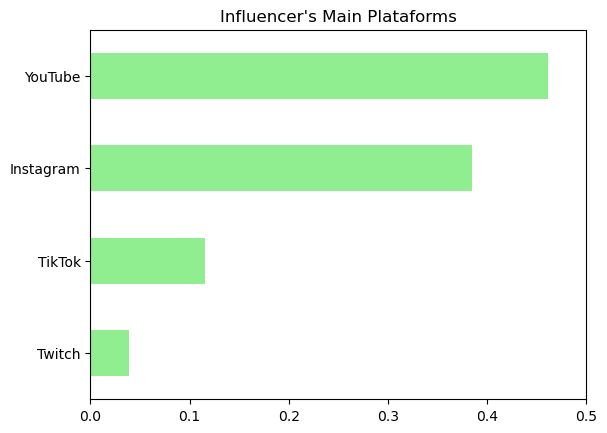

In [26]:
import matplotlib.pyplot as plt

# Barchart of main platforms
df_influencers['main platform'].value_counts(ascending=True, normalize=True).plot(kind='barh', color='lightgreen')
plt.title('Influencer\'s Main Plataforms')
# plt.xlabel('Plataform')
plt.ylabel('')
plt.xlim(0, 0.5)
plt.show()

#que pretendo con este plot.? add porcentage? stronger msg

# I am starting using plots to visualize the datast 

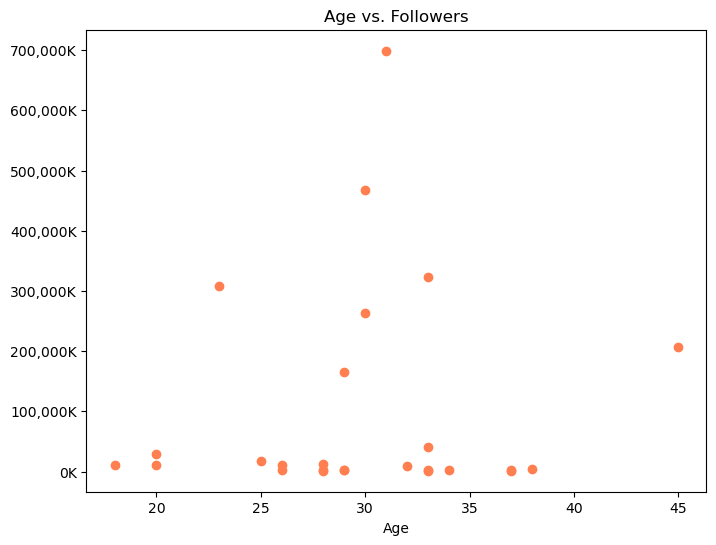

In [29]:
import matplotlib.ticker as ticker

plt.figure(figsize=(8, 6))
plt.scatter(df_influencers['age'], df_influencers['followers']/1000, color='coral')
plt.title('Age vs. Followers')
plt.xlabel('Age')
plt.ylabel('')

#  Formato de  ejes
ax = plt.gca()  
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}K'))  # formato sin notación científica, 
plt.show()


#chek the values/nr
# Scatterplot age vs. follower
#  I want to find out if there is any relation in between age and followers, then I'm going to print out a Scatterplot

# when we are watching this graphuics, or looking at thhis grafcit, you can see that the ponts are in a shape of T, what does it mean? 
# patrones?? patterns

In [30]:
import seaborn as sns
from scipy.stats import pearsonr

#I expect to find any correlation in between these two variables
# correlación
correlation, alfa = pearsonr(df_influencers['age'], df_influencers['followers'])
print(f'Correlación entre edad y número de seguidores: {correlation:.2f}')

#no correlation

print(alfa) #need to read about it, p value gives me the certainty I can trust this number. All in all, 

#it is non linear 


Correlación entre edad y número de seguidores: 0.09
0.6551948246009751


In [31]:
#pearsonr? #high p value

## Influencers content dataset

In [32]:
path_file_content = r"C:\Users\Celeste\Google Drive Streaming\My Drive\_CODEOP\EDA_Feminism_Influencers_Spain\data\Influencers Content Analysis (September 22nd_December 22nd).xlsx"

df_content = pd.read_excel(path_file_content)

df_content.head()

,Influencer's Name,Week,Codification,Main phrase or publication,Time Stamp,Social Media Platform,Link,General description of the content (in Spanish),# Publication in this week,Views/Likes
0,Andrea Compton,19 Septiembre - 25 Septiembre,98,Sin contenido,NaN,Youtube,NaN,NaN,NaN,NaN
1,Andrea Compton,26 Septiembre - 2 Octubre,34,LAS MEJORES ESCENAS DE JUEGO DE TRONOS | Andre...,NaN,Youtube,https://www.youtube.com/watch?v=sO7idHTgtPE&ab...,Video de Andrea Compton comentando las escenas...,1.0,7500
2,Andrea Compton,3 Octubre - 9 Octubre,35,HABLEMOS DE LANA DEL REY | Andrea Compton,NaN,Youtube,https://www.youtube.com/watch?v=n-Ytp6PARis&ab...,Video de Andrea Compton hablando de la vida de...,1.0,15000
3,Andrea Compton,10 Octubre - 17 Octubre,98,Sin contenido,NaN,Youtube,NaN,NaN,NaN,NaN
4,Andrea Compton,17 Octubre - 23 Octubre,34,REPASANDO THE WALKING DEAD (LAS 11 TEMPORADAS)...,NaN,Youtube,https://www.youtube.com/watch?v=H7HJtE1L_zE&ab...,Video de Andrea Compton comentando 'The walkin...,1.0,10000


In [33]:
df_content.shape

(364, 10)

In [34]:
df_content['Codification'].value_counts()


Codification
32            53
98            52
30            20
32, 47        14
45            13
              ..
36, 42         1
19, 36, 47     1
19, 32         1
42, 47         1
31. 47         1
Name: count, Length: 126, dtype: int64

In [35]:
cod_36 = df_content[df_content['Codification'] == 36]


In [36]:
cod_36.head()

,Influencer's Name,Week,Codification,Main phrase or publication,Time Stamp,Social Media Platform,Link,General description of the content (in Spanish),# Publication in this week,Views/Likes
126,Iker Unzu,19 Septiembre - 25 Septiembre,36,Lol #parati #ikerunzu,NaN,TikTok,https://www.tiktok.com/@ikerunzu/video/7146618...,Video en el que aparece probando un filtro com...,7.0,1300000
128,Iker Unzu,3 Octubre - 9 Octubre,36,Será verdad? 😂 @palomaresmagic #stitch #para...,NaN,TikTok,https://www.tiktok.com/@ikerunzu/video/7150351...,Intenta replicar un truco que sale mal y deja ...,2.0,2500000
132,Iker Unzu,31 Octubre - 6 Noviembre,36,Aunque lo abriese silenciosamente 😂 #parati #...,NaN,TikTok,https://www.tiktok.com/@ikerunzu/video/7161469...,Simula cuando abrías un paquete de galletas en...,5.0,5700000
133,Iker Unzu,7 Noviembre - 13 Noviembre,36,Tú lo sabías?! 😂 #parati #fyp #ikerunzu #gr...,NaN,TikTok,https://www.tiktok.com/@ikerunzu/video/7164838...,Quejándose de que TikTok avisa al resto de usu...,1.0,2600000
137,Iker Unzu,5 Diciembre - 11 Diciembre,36,Las batallas de baile son lo mejor 😂 #parati ...,NaN,TikTok,https://www.tiktok.com/@ikerunzu/video/7174850...,Mofándose de las batallas de baile que aparece...,3.0,6400000


In [37]:
df_content['General description of the content (in Spanish)'][37]

'Video de Carolina Iglesias entrevistando a Maxi Iglesias hablando de la amistad como tema central'

## Feminism and Antifeminism Codebook

In [38]:
import matplotlib.pyplot as plt
import nltk

from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import RegexpTokenizer

from sklearn import svm
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

In [39]:
path_file_codebook = r"C:\Users\Celeste\Google Drive Streaming\My Drive\_CODEOP\EDA_Feminism_Influencers_Spain\data\Codebook - Feminism and Anti-feminism.xlsx"

df_codebook = pd.read_excel(path_file_codebook)

df_codebook.head()

,ID,Code,Definition,Survey question / comments,Category,Sub-category,Feminism Stance
0,1,Equating feminism and machismo,"They do not deny discrimination against women,...","""Tan peligroso es el machismo como el feminism...",Antifeminism,Explicit,Strongly opposing feminism
1,2,Denying the necessity of feminism,Emphasizing equality as the real goal and impl...,"""Lo importante no es el feminismo ni el machis...",Antifeminism,Explicit,Moderatedly opposing feminism
2,3,Minimizing gender inequality at the workplace,Skepticism about gender inequality in the work...,"""Las mujeres exageran los problemas que tienen...",Antifeminism,Latent,Opposing feminist issues
3,4,Supporting paternalistic behaviours,Defending the persistence of paternalistic beh...,"""Los hombres deberían proteger a las mujeres """,Antifeminism,Latent,Opposing feminist issues
4,5,Minimizing Sexual Harassment,Accusing women of overreacting to flirting or ...,"""Actualmente las mujeres malinterpretan cualqu...",Antifeminism,Latent,Opposing feminist issues


In [40]:
df_codebook.shape

(48, 7)

In [41]:
df_codebook['Category'].value_counts() #not balanced

Category
Non-related content    19
Antifeminism           18
Feminism                9
Neutral                 1
No content              1
Name: count, dtype: int64

In [42]:
df_codebook.isna().sum()

ID                             0
Code                           0
Definition                    19
Survey question / comments    27
Category                       0
Sub-category                  20
Feminism Stance                0
dtype: int64

In [43]:
nan_percentage_def= (19 / 48) * 100
nan_percentage_survey= (27 / 48) * 100
nan_percentage_sub= (20 / 48) * 100

print(f"I can see that in the 'Definition' column there is a {nan_percentage_def:.2f}% of NaN values, ")
print(f"in the 'Survey question / comments' column there is a {nan_percentage_survey:.2f}% of NaN values and")
print(f"in the 'Sub-category' column there is a {nan_percentage_sub:.2f}% of NaN values")


I can see that in the 'Definition' column there is a 39.58% of NaN values, 
in the 'Survey question / comments' column there is a 56.25% of NaN values and
in the 'Sub-category' column there is a 41.67% of NaN values


In [44]:
# Filter the NaN rows in 'Sub-category' column, leaving 'Category'
# why keep 'Category' column?
# provides additional context and help to interpret the meaning of NaN values based on their associated categories.

sub_nan_rows = df_codebook[df_codebook['Sub-category'].isna()][['Category', 'Sub-category']]
sub_nan_rows


# Upon reviewing the filtered results, I notice that every instance where the 'Sub-category' is NaN corresponds to a category that lacks 
# related content to the subject. This implies that the primary category does not have specific content that pertains to the topic we are investigating.

## Reflection -> I need to consider approaching this differently. While this dataset contains limited data, what if I had a larger dataset?

,Category,Sub-category
28,Non-related content,NaN
29,Non-related content,NaN
30,Non-related content,NaN
31,Non-related content,NaN
32,Non-related content,NaN
33,Non-related content,NaN
34,Non-related content,NaN
35,Non-related content,NaN
36,Non-related content,NaN
37,Non-related content,NaN


In [45]:
df_codebook.columns

Index(['ID', 'Code', 'Definition', 'Survey question / comments', 'Category',
       'Sub-category', 'Feminism Stance'],
      dtype='object')

In [51]:
df_codebook['Definition'].isna().value_counts()

Definition
False    29
True     19
Name: count, dtype: int64

# TASK 1: Start with pre-processing text

**Pre-processing**
- Use the tokenization from nltk (word_tokenize)
- Use the 2 regex cleaning rules for your data
- Run lemmatization
- Lower-case

In [ ]:
def my_clean_data(text):

return 

In [78]:
sample_definition = df_codebook['Definition'][0]
sample_definition

'They do not deny discrimination against women, but express that feminism is just as dangerous as discrimination against women.'

In [79]:
REPLACE_NO_SPACE = re.compile("[.;:!\'?,\"()\[\]]")
REPLACE_WITH_SPACE = re.compile("(<br\s*/><br\s*/>)|(\-)|(\/)")

<>:1: SyntaxWarning: invalid escape sequence '\['
<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\['
<>:2: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Celeste\AppData\Local\Temp\ipykernel_12184\524117050.py:1: SyntaxWarning: invalid escape sequence '\['
  REPLACE_NO_SPACE = re.compile("[.;:!\'?,\"()\[\]]")
C:\Users\Celeste\AppData\Local\Temp\ipykernel_12184\524117050.py:2: SyntaxWarning: invalid escape sequence '\s'
  REPLACE_WITH_SPACE = re.compile("(<br\s*/><br\s*/>)|(\-)|(\/)")


In [82]:
#remove special characters
sample_definition = re.sub(REPLACE_NO_SPACE, "", sample_definition)

#token
tokens = word_tokenize(sample_definition)

#lower
sample_definition = sample_definition.lower()

#lemmas
lemmatiser = WordNetLemmatizer()

lemmas = [lemmatiser.lemmatize(token, pos='v') for token in tokens]

In [83]:
sample_definition

'they do not deny discrimination against women but express that feminism is just as dangerous as discrimination against women'

In [84]:
text = df_codebook['Definition'][0]


print('before cleaning: ', text)
print('\n')
print('after cleaning: ', sample_definition)

before cleaning:  They do not deny discrimination against women, but express that feminism is just as dangerous as discrimination against women.


after cleaning:  they do not deny discrimination against women but express that feminism is just as dangerous as discrimination against women


In [89]:
import spacy

# Cargar el modelo en español
nlp_es = spacy.load("es_core_news_sm")

# Probar el modelo con un texto en español
doc = nlp_es("Hola, esta es una oración de prueba.")
for token in doc:
    print(token.text, token.pos_)


Hola PROPN
, PUNCT
esta PRON
es AUX
una DET
oración NOUN
de ADP
prueba NOUN
. PUNCT


In [90]:
import spacy

# Cargar el modelo en inglés
nlp_en = spacy.load("en_core_web_sm")

# Probar el modelo con un texto en inglés
doc = nlp_en("Hello, this is a test sentence.")
for token in doc:
    print(token.text, token.pos_)


Hello INTJ
, PUNCT
this PRON
is AUX
a DET
test NOUN
sentence NOUN
. PUNCT
